In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset

dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [4]:
# Training SOM
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

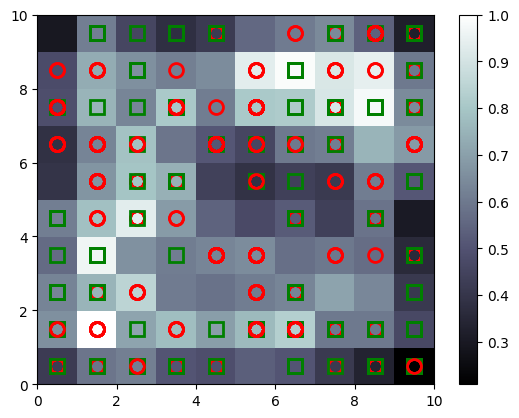

In [10]:
# Visualize results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)

show()
    

In [11]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5644446e+07, 1.0000000e+00, 3.3500000e+01, 1.7500000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 4.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.5300000e+02, 8.5800000e+02],
       [1.5803378e+07, 1.0000000e+00, 3.4920000e+01, 5.0000000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 7.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0010000e+03],
       [1.5714087e+07, 1.0000000e+00, 3.2750000e+01, 1.5000000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 5.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5730793e+07, 1.0000000e+00, 2.7250000e+01, 1.5850000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 1.8350000e+00,
        1.0000000e+00, 1.0000000e+00, 1.2000000e+01, 1.0000000e+00,
        2.0000000e+00,